In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
import scipy.stats as stats

# Generate the synthetic data

Define the Lotka-Volterra model:

In [2]:
def lotka_volterra(t, u, theta):
    u1, u2 = u
    return [
        theta[0] * u1 - theta[1]* u1 * u2,
        theta[3] * u1 * u2 - theta[2] * u2,
    ]

Solve the coupled ODEs:

In [3]:
t_n = 2500  # number of time data points
t_span = [0, 25]  # the time span over which to integrate the system
theta = [0.67, 1.33, 1, 1]  # parameters of the model
u_init = [1, 1]  # initial values

In [4]:
sol = solve_ivp(lotka_volterra, t_span, u_init, args=(theta,), dense_output=True)

In [5]:
t = np.linspace(t_span[0], t_span[1], t_n)
z = sol.sol(t)

Add Gaussian noise:

In [6]:
rng = np.random.default_rng(12345)

In [7]:
means = [0, 0]
cov = np.diag([0.2 ** 2, 0.2 ** 2])

In [8]:
eps = stats.multivariate_normal.rvs(mean=means, cov=cov, size=len(t), random_state=rng)
z_noisy = z + eps.T

Plot the resulting values:

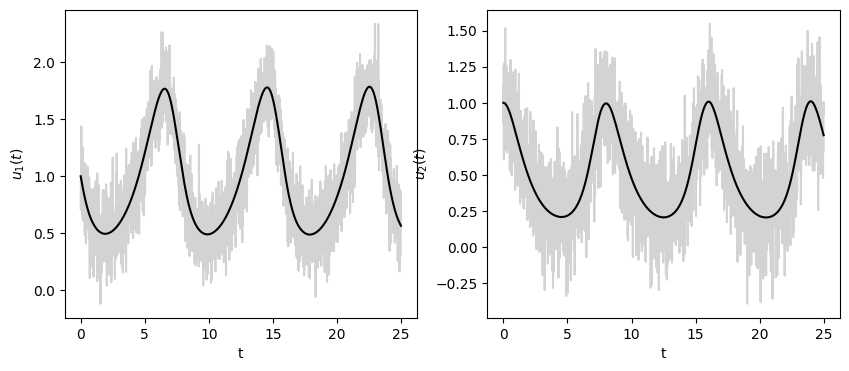

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for i in range(2):
    axs[i].plot(t, z_noisy[i], color='lightgray');
    axs[i].plot(t, z[i], color='black');
    axs[i].set_xlabel('t');
    axs[i].set_ylabel(f'$u_{i + 1}(t)$');